In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Open a simple image
m=cv2.imread("IMG-20190131-WA0032.jpg")
img_HSV = cv2.cvtColor(m, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 80, 20), (25, 255, 255)) 
target = cv2.bitwise_and(m,m, mask=HSV_mask)
cv2.imwrite('segmented out region.jpg',target)

True

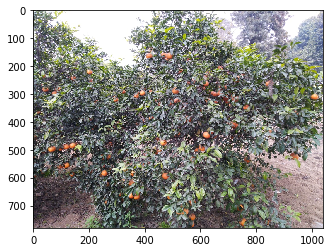

In [3]:
plt.imshow(cv2.cvtColor(m, cv2.COLOR_BGR2RGB))

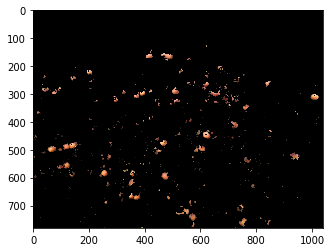

In [4]:
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))

In [5]:
contours,hierarchy  = cv2.findContours(cv2.cvtColor(target, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
bounding_boxes = []
threshold = 75
ar=[]
imgwithbox = m.copy()



In [7]:
for c in contours:
    area = cv2.contourArea(c)
    if area >threshold:
        [x,y,w,h]=cv2.boundingRect(c)
        bounding_boxes.append([x,y,w,h])
        print([x,y,w,h])
        area_rect=w*h
        print(area_rect)
        ar.append(area_rect)
        cv2.rectangle(imgwithbox,(x,y),(x+w,y+h),(0,255,0),2)

print(len(bounding_boxes))
print(ar)
total_area=sum(ar)
print(total_area)
avg_rect= total_area/len(bounding_boxes)
print(avg_rect)

[568, 757, 12, 21]
252
[839, 748, 14, 23]
322
[737, 744, 29, 32]
928
[559, 728, 28, 27]
756
[512, 722, 30, 11]
330
[539, 707, 20, 26]
520
[731, 695, 25, 28]
700
[559, 681, 10, 21]
210
[256, 680, 12, 15]
180
[479, 666, 17, 13]
221
[343, 651, 44, 30]
1320
[307, 651, 17, 17]
289
[781, 622, 14, 15]
210
[261, 613, 14, 20]
280
[341, 605, 25, 24]
600
[460, 579, 28, 29]
812
[128, 577, 22, 21]
462
[348, 573, 19, 24]
456
[235, 572, 35, 26]
910
[84, 544, 49, 26]
1274
[756, 525, 26, 25]
650
[264, 517, 16, 19]
304
[922, 509, 37, 27]
999
[435, 499, 27, 19]
513
[91, 492, 15, 13]
195
[52, 485, 32, 25]
800
[578, 481, 39, 28]
1092
[107, 470, 64, 30]
1920
[453, 464, 28, 23]
644
[437, 454, 16, 14]
224
[583, 429, 18, 22]
396
[607, 422, 30, 39]
1170
[709, 394, 27, 32]
864
[558, 385, 11, 15]
165
[752, 337, 24, 21]
504
[649, 325, 17, 11]
187
[505, 317, 23, 18]
414
[288, 316, 19, 14]
266
[677, 309, 30, 26]
780
[994, 300, 30, 24]
720
[709, 300, 28, 30]
840
[362, 291, 41, 25]
1025
[630, 287, 42, 23]
966
[318, 28

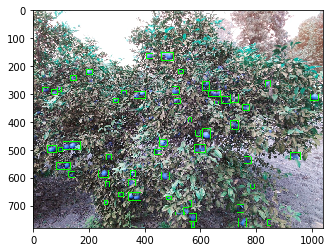

In [8]:
cv2.imwrite('oranges with bounding boxes.jpg',imgwithbox)
plt.imshow(imgwithbox)

In [9]:
q=np.asarray(ar)
number_of_oranges_list=[]
print(q)
no_of_oranges = q/avg_rect
print(no_of_oranges)
rounded_value=np.around(no_of_oranges,0)
print(rounded_value)
total_fruits=sum(rounded_value)
print(total_fruits)

[ 252  322  928  756  330  520  700  210  180  221 1320  289  210  280
  600  812  462  456  910 1274  650  304  999  513  195  800 1092 1920
  644  224  396 1170  864  165  504  187  414  266  780  720  840 1025
  966  208  360  408  240  702  891  418  399  396  306  408 1276]
[0 0 1 1 0 0 1 0 0 0 2 0 0 0 1 1 0 0 1 2 1 0 1 0 0 1 1 3 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 2]
[0 0 1 1 0 0 1 0 0 0 2 0 0 0 1 1 0 0 1 2 1 0 1 0 0 1 1 3 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 2]
29


In [10]:
number_of_oranges_list=[]
print(no_of_oranges)
for count in enumerate(no_of_oranges):
#     print(index)
    if count[1]<0.3:
        no_of_oranges[count[0]]=0
    elif count[1]>0.3 and count[1]<1.5:
        no_of_oranges[count[0]]=1
    elif count[1]>1.5 and count[1]<2.5:
        no_of_oranges[count[0]]=2
    elif count[1]>2.5 and count[1]<3.5:
        no_of_oranges[count[0]]=3
no_of_oranges     
fruits=sum(no_of_oranges )
print(fruits)


[0 0 1 1 0 0 1 0 0 0 2 0 0 0 1 1 0 0 1 2 1 0 1 0 0 1 1 3 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 2]
29


In [16]:
output = m.copy()
#cv2.putText(output, "WELCOME TO PROJECT FRUIT", (10, 25), 

#cv2.putText(output,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
cv2.putText(output,'OpenCV'+str(fruits), (10, 25),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.imshow("Text", output)
cv2.imwrite("Text.jpg", output)


True

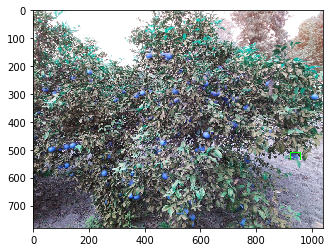

In [17]:

cv2.rectangle(m,(922,509),(922+37,509+27),(0,255,0),2)
plt.imshow(m)
